# 02-1 CNN으로 강아지와 고양이 분류하기

<table align="left"><tr><td>
<a href="https://colab.research.google.com/github/rickiepark/hm-dl/blob/main/02-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="코랩에서 실행하기"/></a>
</td></tr></table>

## AlexNet

In [1]:
import keras
from keras import layers

In [2]:
alexnet = keras.Sequential()
alexnet.add(layers.Conv2D(filters=96, kernel_size=11, strides=4,
                          activation='relu', input_shape=(227, 227, 3)))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Conv2D(filters=256, kernel_size=5, padding='same',
                          activation='relu'))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',
                          activation='relu'))
alexnet.add(layers.Conv2D(filters=384, kernel_size=3, padding='same',
                          activation='relu'))
alexnet.add(layers.Conv2D(filters=256, kernel_size=3, padding='same',
                          activation='relu'))
alexnet.add(layers.MaxPooling2D(pool_size=3, strides=2))
alexnet.add(layers.Flatten())
alexnet.add(layers.Dense(4096, activation='relu'))
alexnet.add(layers.Dropout(0.5))
alexnet.add(layers.Dense(4096, activation='relu'))
alexnet.add(layers.Dropout(0.5))
alexnet.add(layers.Dense(1000, activation='softmax'))

In [3]:
alexnet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2  (None, 27, 27, 96)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 384)       1

## VGGNet

In [4]:
vggnet = keras.Sequential()
vggnet.add(layers.InputLayer(input_shape=(224, 224, 3)))

# 1, 2번째 블록
for n_filters in [64, 128]:
    for _ in range(2):
        vggnet.add(layers.Conv2D(filters=n_filters, kernel_size=3,
                                 padding='same', activation='relu'))
    vggnet.add(layers.MaxPooling2D(pool_size=2))

# 3, 4, 5번째 블록
for n_filters in [256, 512, 512]:
    for _ in range(3):
        vggnet.add(layers.Conv2D(filters=n_filters, kernel_size=3,
                                 padding='same', activation='relu'))
    vggnet.add(layers.MaxPooling2D(pool_size=2))

vggnet.add(layers.Flatten())
vggnet.add(layers.Dense(4096, activation='relu'))
vggnet.add(layers.Dense(4096, activation='relu'))
vggnet.add(layers.Dense(1000, activation='softmax'))

In [5]:
vggnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 128)       0         
 g2D)                                                 

## 케라스에 내장된 모델 사용하기

In [6]:
vggnet = keras.applications.VGG16()

553467096/553467096 [==============================] - 8s 0us/step


In [7]:
!gdown 1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
!unzip cat-dog-images.zip

Downloading...
From: https://drive.google.com/uc?id=1xGkTT3uwYt4myj6eJJeYtdEFgTi2Sj8C
To: /content/cat-dog-images.zip
100% 182k/182k [00:00<00:00, 5.21MB/s]
Archive:  cat-dog-images.zip
   creating: images/
  inflating: images/dog.png          
  inflating: images/cat.png          


In [8]:
from PIL import Image

dog_png = Image.open('images/dog.png')

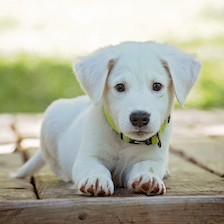

In [9]:
display(dog_png)

In [10]:
import numpy as np

dog_array = np.array(dog_png)

In [11]:
dog_array.shape

(224, 224, 3)

In [12]:
from keras.applications import vgg16

vgg_prep_dog = vgg16.preprocess_input(dog_array)

In [13]:
predictions = vggnet.predict(vgg_prep_dog[np.newaxis,:])

1/1 [==============================] - 3s 3s/step


In [14]:
max_index = np.argmax(predictions)
print(max_index, predictions[0][max_index])

208 0.35698125


In [15]:
import requests

url = "https://storage.googleapis.com/download.tensorflow.org/" + \
      "data/imagenet_class_index.json"
json_data = requests.get(url).json()

In [16]:
json_data[str(max_index)]

['n02099712', 'Labrador_retriever']

In [17]:
vgg16.decode_predictions(predictions)

35363/35363 [==============================] - 0s 0us/step


[[('n02099712', 'Labrador_retriever', 0.35698125),
  ('n02099601', 'golden_retriever', 0.14486566),
  ('n02104029', 'kuvasz', 0.09278717),
  ('n02111500', 'Great_Pyrenees', 0.06916992),
  ('n02106166', 'Border_collie', 0.056728795)]]

In [18]:
vgg16.decode_predictions(predictions, top=1)

[[('n02099712', 'Labrador_retriever', 0.35698125)]]

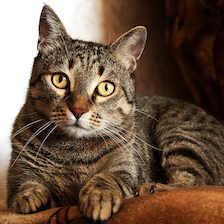

In [19]:
cat_png = Image.open('images/cat.png')
display(cat_png)

In [20]:
vgg_prep_cat = vgg16.preprocess_input(np.array(cat_png))
predictions = vggnet.predict(vgg_prep_cat[np.newaxis,:])
vgg16.decode_predictions(predictions)

1/1 [==============================] - 0s 19ms/step


[[('n02123045', 'tabby', 0.432753),
  ('n02124075', 'Egyptian_cat', 0.31128028),
  ('n02123159', 'tiger_cat', 0.21606483),
  ('n02971356', 'carton', 0.0035795623),
  ('n03223299', 'doormat', 0.0031308203)]]

## ResNet

### ResNet50 입력 준비하기

In [21]:
inputs = layers.Input(shape=(224, 224, 3))

In [22]:
x = layers.ZeroPadding2D(padding=3)(inputs)
x = layers.Conv2D(64, 7, strides=2)(x)

$\mu_B = \dfrac{1}{m}\displaystyle\sum_{i=1}^{m} x_i$

$\sigma^2_B = \dfrac{1}{m}\displaystyle \sum_{i=1}^m (x_i-\mu_B)^2$

$\hat{x}_i = \dfrac{x_i - \mu_B}{\sqrt{\sigma^2_B+\epsilon}}$

$z_i = \gamma \hat{x}_i + \beta$

In [23]:
x = layers.BatchNormalization(epsilon=1e-5)(x)
x = layers.Activation('relu')(x)

In [24]:
x = layers.ZeroPadding2D(padding=1)(x)
x = layers.MaxPooling2D(3, strides=2)(x)

### 잔차 스택 만들기

In [25]:
def build_stack(x):
    # 첫 번째 잔차 스택의 첫 번째 잔차 블록만 스트라이드 1을 사용합니다
    x = residual_stack(x, 3, 64, first_stride=1)
    # 두 번째~네 번째 잔차 블록을 만듭니다
    for blocks, filters in [(4, 128), (6, 256), (3, 512)]:
        x = residual_stack(x, blocks, filters, first_stride=2)
    return x

def residual_stack(x, blocks, filters, first_stride=2):
    # 첫 번째 잔차 블록은 합성곱 스킵 연결을 사용하고
    # 이 잔차 블록의 첫 번째 합성곱 스트라이드는 first_stride입니다.
    x = residual_block(x, filters, first_stride=first_stride, conv_skip=True)
    for _ in range(1, blocks):
        # 나머지 잔차 블록의 첫 번째 합성곱 스트라이드는 1입니다.
        x = residual_block(x, filters, first_stride=1, conv_skip=False)
    return x

In [26]:
def residual_block(x, filters, first_stride=1, conv_skip=False):
    skip_conn = x
    # 합성곱과 배치 정규화, 렐루 활성화 함수를 반복합니다
    # 1x1, filters개 필터, 스트라이드는 first_stride에 따라 1 또는 2
    x = layers.Conv2D(filters=filters, kernel_size=1,
                      strides=first_stride)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    # 3x3, filters개 필터
    x = layers.Conv2D(filters=filters, kernel_size=3,
                      padding='same')(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    x = layers.Activation('relu')(x)
    # 1x1, filters*4개 필터
    x = layers.Conv2D(filters=filters*4, kernel_size=1)(x)
    x = layers.BatchNormalization(epsilon=1e-5)(x)
    # conv_skip이 True이면 1x1 합성곱을 사용해 채널 크기를 filters*4로 늘립니다
    if conv_skip == True:
        skip_conn = layers.Conv2D(filters=filters*4, kernel_size=1,
                                  strides=first_stride)(skip_conn)
        skip_conn = layers.BatchNormalization(epsilon=1e-5)(skip_conn)
    x = layers.Add()([skip_conn, x])
    x = layers.Activation('relu')(x)
    return x

In [27]:
x = build_stack(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1000, activation='softmax')(x)
model = keras.Model(inputs, outputs)

In [28]:
def build_stack101(x):
    # 첫 번째 잔차 스택의 첫 번째 잔차 블록만 스트라이드 1을 사용합니다
    x = residual_stack(x, 3, 64, first_stride=1)
    # 두 번째~네 번째 잔차 블록을 만듭니다
    for blocks, filters in [(4, 128), (23, 256), (3, 512)]:
        x = residual_stack(x, blocks, filters, first_stride=2)
    return x

def build_stack152(x):
    # 첫 번째 잔차 스택의 첫 번째 잔차 블록만 스트라이드 1을 사용합니다
    x = residual_stack(x, 3, 64, first_stride=1)
    # 두 번째~네 번째 잔차 블록을 만듭니다
    for blocks, filters in [(8, 128), (36, 256), (3, 512)]:
        x = residual_stack(x, blocks, filters, first_stride=2)
    return x

### 샘플 데이터로 예측하기

In [29]:
from keras.applications import resnet

resnet_prep_dog = resnet.preprocess_input(np.array(dog_png))

In [30]:
resnet50 = keras.applications.ResNet50()
predictions = resnet50.predict(resnet_prep_dog[np.newaxis,:])

1/1 [==============================] - 2s 2s/step


In [31]:
resnet.decode_predictions(predictions)

[[('n02099712', 'Labrador_retriever', 0.3853527),
  ('n02099601', 'golden_retriever', 0.08969969),
  ('n02100735', 'English_setter', 0.042124216),
  ('n02106166', 'Border_collie', 0.037774347),
  ('n02101388', 'Brittany_spaniel', 0.030700443)]]

In [32]:
resnet_prep_cat = resnet.preprocess_input(np.array(cat_png))
predictions = resnet50.predict(resnet_prep_cat[np.newaxis,:])

1/1 [==============================] - 0s 23ms/step


In [33]:
resnet.decode_predictions(predictions)

[[('n02123045', 'tabby', 0.86861),
  ('n02124075', 'Egyptian_cat', 0.05077506),
  ('n02123159', 'tiger_cat', 0.04256709),
  ('n07930864', 'cup', 0.0027631482),
  ('n03443371', 'goblet', 0.0020991685)]]

## 심화 예제

In [34]:
from keras.utils import load_img
from keras.applications import inception_v3

dog_png = load_img("images/dog.png", target_size=(299, 299))
incep_prep_dog = inception_v3.preprocess_input(np.array(dog_png))

In [35]:
inception = keras.applications.InceptionV3()
predictions = inception.predict(incep_prep_dog[np.newaxis,:])
inception_v3.decode_predictions(predictions)

1/1 [==============================] - 3s 3s/step


[[('n02104029', 'kuvasz', 0.1383507),
  ('n02099712', 'Labrador_retriever', 0.07777292),
  ('n02106166', 'Border_collie', 0.071983404),
  ('n02111500', 'Great_Pyrenees', 0.066149056),
  ('n02099601', 'golden_retriever', 0.0283834)]]

In [36]:
cat_png = load_img("images/cat.png", target_size=(299, 299))
incep_prep_cat = inception_v3.preprocess_input(np.array(cat_png))
predictions = inception.predict(incep_prep_cat[np.newaxis,:])
inception_v3.decode_predictions(predictions)

1/1 [==============================] - 0s 36ms/step


[[('n02124075', 'Egyptian_cat', 0.6867369),
  ('n02123159', 'tiger_cat', 0.13262996),
  ('n02123045', 'tabby', 0.0421502),
  ('n04040759', 'radiator', 0.0016103365),
  ('n02971356', 'carton', 0.0011297752)]]

In [37]:
from keras.applications import inception_resnet_v2 as incep_res_v2

incep_res_prep_dog = incep_res_v2.preprocess_input(np.array(dog_png))
inception_resnet = keras.applications.InceptionResNetV2()
predictions = inception_resnet.predict(incep_res_prep_dog[np.newaxis,:])
incep_res_v2.decode_predictions(predictions)

1/1 [==============================] - 5s 5s/step


[[('n02099712', 'Labrador_retriever', 0.65633386),
  ('n02104029', 'kuvasz', 0.13956147),
  ('n02099601', 'golden_retriever', 0.055945143),
  ('n02111500', 'Great_Pyrenees', 0.048894607),
  ('n02100735', 'English_setter', 0.0021178785)]]

In [38]:
incep_res_prep_cat = incep_res_v2.preprocess_input(np.array(cat_png))
predictions = inception_resnet.predict(incep_res_prep_cat[np.newaxis,:])
incep_res_v2.decode_predictions(predictions)

1/1 [==============================] - 0s 41ms/step


[[('n02123045', 'tabby', 0.42494792),
  ('n02124075', 'Egyptian_cat', 0.2583104),
  ('n02123159', 'tiger_cat', 0.12795246),
  ('n02127052', 'lynx', 0.0034486067),
  ('n04525038', 'velvet', 0.0024461013)]]